In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

titanic = pd.read_csv('titanic_dataset.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
titanic = titanic.dropna(subset=['Embarked'])

In [5]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())
titanic['Cabin']=titanic['Cabin'].fillna('Unknown')

In [6]:
print(titanic.isnull().sum())
titanic.head()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [7]:
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic=titanic.drop(columns=[col for col in columns_to_drop if col in titanic.columns])

In [8]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [10]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print(titanic['Sex'].value_counts())
print(titanic['Pclass'].value_counts())
print(titanic['Embarked'].value_counts())

Sex
male      577
female    312
Name: count, dtype: int64
Pclass
3    491
1    214
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

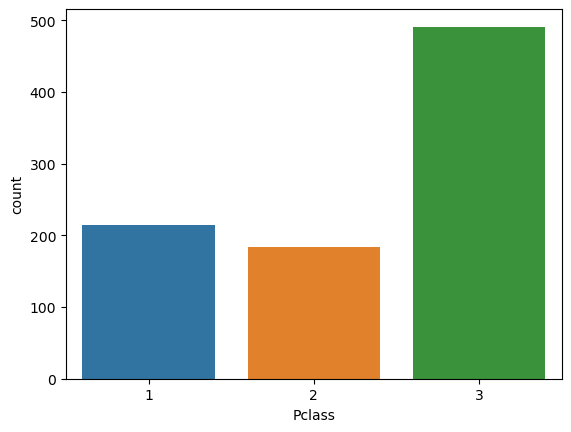

In [12]:
sns.countplot(data=titanic,x='Pclass')

<Axes: >

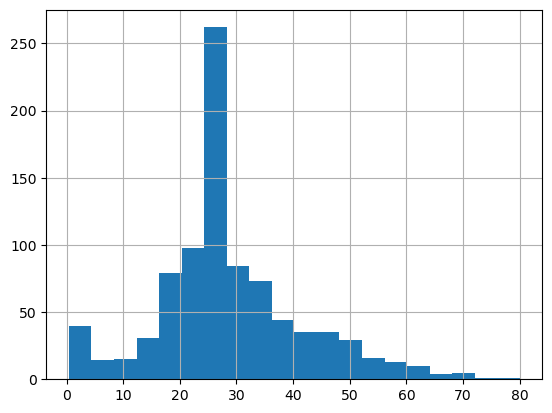

In [13]:
titanic['Age'].hist(bins=20)

<Axes: xlabel='Sex', ylabel='Survived'>

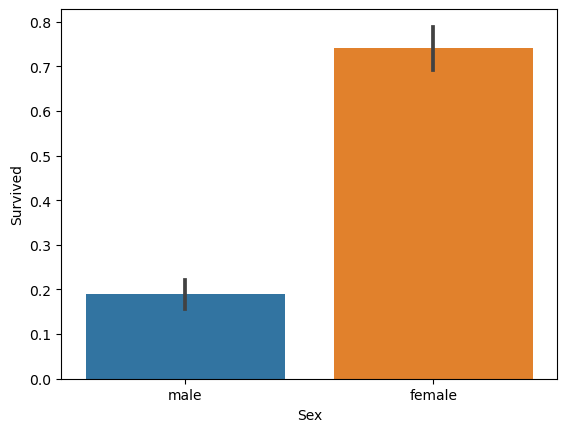

In [14]:
sns.barplot(data=titanic,x='Sex',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

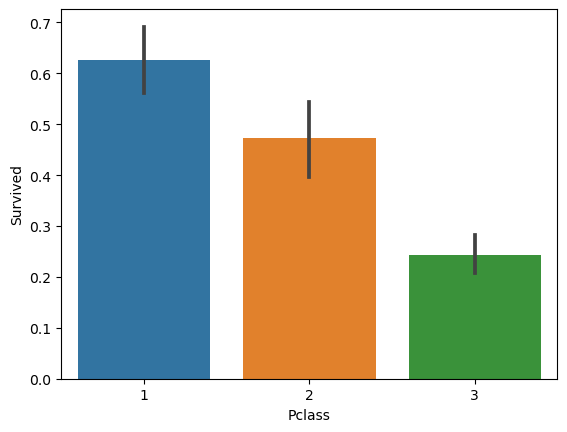

In [16]:
sns.barplot(data=titanic,x='Pclass',y='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

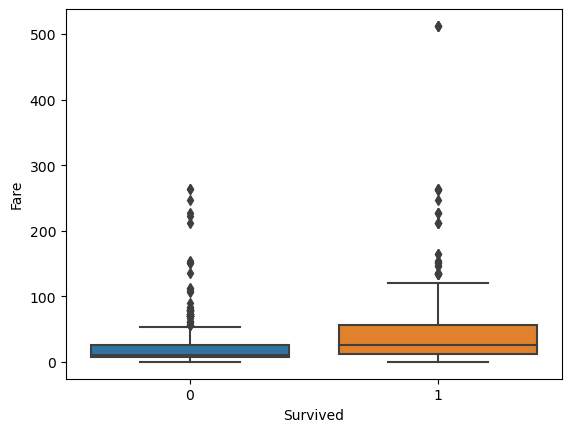

In [17]:
sns.boxplot(data=titanic,x='Survived',y='Fare')

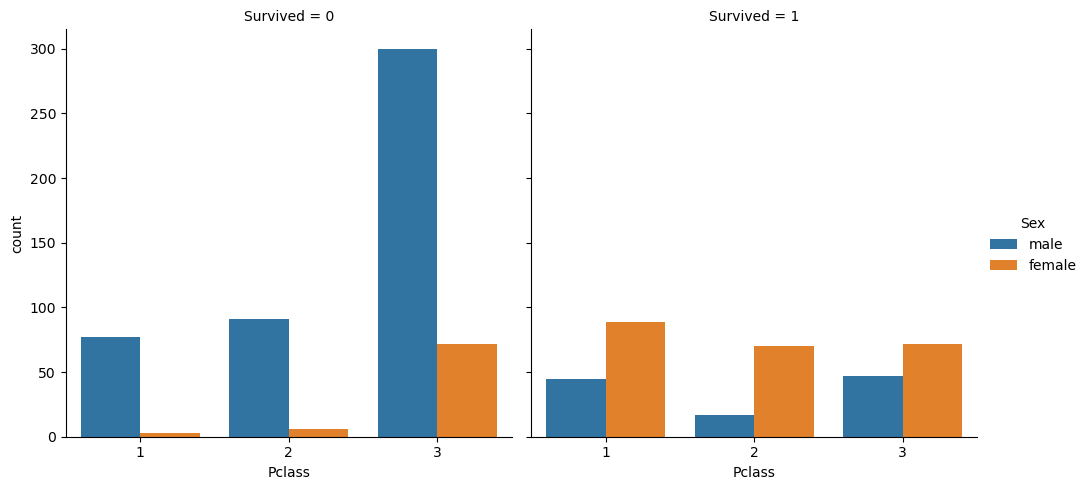

In [18]:
sns.catplot(data=titanic,x='Pclass',hue='Sex',col='Survived',kind='count')

In [30]:
titanic['Sex']=titanic['Sex'].map({'male':1,'female':0})
titanic=pd.get_dummies(titanic,columns=['Embarked'],drop_first=True)

In [31]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,-0.075217,0.121405
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.030436,-0.008964
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,-0.116684,-0.163758
Embarked_Q,0.004536,0.220558,-0.075217,-0.030436,-0.026692,-0.081585,-0.116684,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.121405,-0.008964,0.069438,0.061512,-0.163758,-0.499261,1.000000


<Axes: >

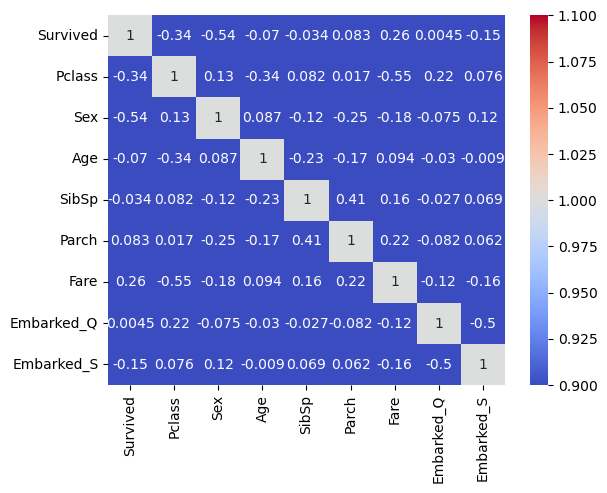

In [34]:
sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm',vmin=1,vmax=1)

In [ ]:
survival_counts=titanic['Survived']